# Korelace a regrese
Zdroj: [Jiří Pešík. *Python pro data science.*](https://github.com/pesikj/PythonProDataScience)
(upraveno)


## Korelace

V reálném světě se často stává, že nějaká skutečnost má vliv na něco jiného. Například čas strávený studiem má vliv na body. V souboru [Student_Marks.csv](Student_Marks.csv) jsou data o průměrné době, kterou uživatelé strávili studiem on-line kurzu, a průměrným počtem bodů, které z kurzů dostali. Podívejme se, jak silný je vliv doby strávené studiem na bodový výsledek.

In [9]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

data = pd.read_csv("Student_Marks.csv")
data

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


K zobrazení použijeme bodový graf (*scatter plot*). Na vodorovné ose máme průměrný čas strávený studiem a na svislé ose průměrný počet bodů. Vidíme, že známka má tendenci růst s tím, jak roste čas strávený studiem. Současně je patrný jistý vliv náhody. Takové závislosti se říká stochastická závislost (*stochastic dependence*). Dále platí, že závislost je lineární (*linear*), tj. kdybychom ho chtěly popsat pomocí matematické funkce, mohli bychom použít přímku.

<Axes: xlabel='time_study', ylabel='Marks'>

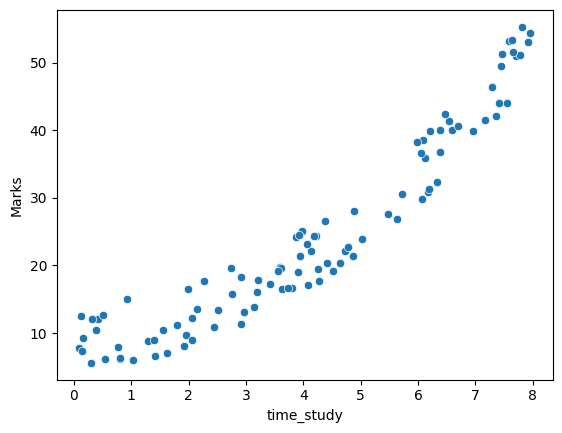

In [10]:
sns.scatterplot(data=data, x="time_study", y="Marks")

Takové závislosti říkáme **korelace** (*correlation*) a to, jak je závislost silná, můžeme popsat pomocí **korelačního koeficientu** (*correlation coefficient*). Pro jeho hodnoty platí následující:

- Hodnoty blízko +1 znamenají silnou přímou lineární závislost, tj. hodnoty v obou sloupcích rostou současně.
- Hodnoty blízko 0 znamenají lineární nezávislost.
- Hodnoty blízko -1 znamenají silnou nepřímou lineární závislost, tj. jedna hodnota roste a současně druhá klesá.

Příklady přímé závislosti: čas strávený studiem a výsledek v testu, délka tréninku a výsledek v závodě, délka praxe a výše mzdy atd. Příklady nepřímé závislosti: množství vypitého alkoholu a kognitivní schopnosti, zimní teploty a spotřeba energie na vytápění.

Hodnotu korelace zjistíme pomocí metody `corr()` pro zvolenou tabulku.

In [11]:
data.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


Korelace automaticky neznamená, že obě veličiny se vzájemně ovlivňují.

Uvažujme například počet turistů a počet komárů v kempu u přehrady. Obě veličiny jsou sice korelované, ale v důsledku počasí jako třetího vlivu. Pokud bychom například kemp zavřeli a počet turistů by klesl na nulu, počet komárů to nijak neovlivní.

Podobně můžeme "odhalit" korelaci, která je ve skutečnosti náhodná. Doslova legendárním příkladem se stala korelace mezi počtem lidí, kteří se utopili v důsledku pádu do bazénu, a počtem filmů, ve kterých hrál Nicolas Cage. Z logiky věci je jasné, že tyto veličiny se vzájemně nijak neovlivňují, přesto bychom mezi nimi našli vysokou korelaci.


## Regrese

Samotná informace o tom, že existuje statisticky významný vztah mezi proměnnými, sice může být zajímavá, ale můžeme zjistit více. K tomu můžeme využít regresi. Regrese je nástroj, který umí vztah mezi dvěma proměnnými popsat. Abychom si pod slovem "popsat" dokázali něco představit, využijeme graf. Využijeme opět modul `seaborn`, tentokrát vygenerujeme graf pomocí funkce `regplot()`. U regrese vždy rozlišujeme mezi **závislou** (**vysvětlovanou**) a **nezávislou** (**vysvětlující**) proměnnou. Závislou proměnnou umísťujeme na svislou osu (*y*) a nezávislou vodorovnou osu (*x*). V našem případě je nezávislou proměnnou čas strávený studiem a závislou počet bodů. Tvrdíme totiž, že čas strávený studiem ovlivňuje počet bodů, tj. počet bodů vysvětlujeme pomocí času stráveného studiem.

Musíme si uvědomit, že výslednou známku ovlivňují i další vlivy - například únava studentů a studentek v době psaní testu, štěstí na otázky atd. Z toho důvodu neleží všechny body na regresní křivce, ale pohybují se kolem ní. Pokud jsou nad ní, pak byl skutečný výsledek studenta nebo studentky lepší, než kolik by predikoval náš model. Pokud je bod pod ní, pak je skutečný výsledek horší.

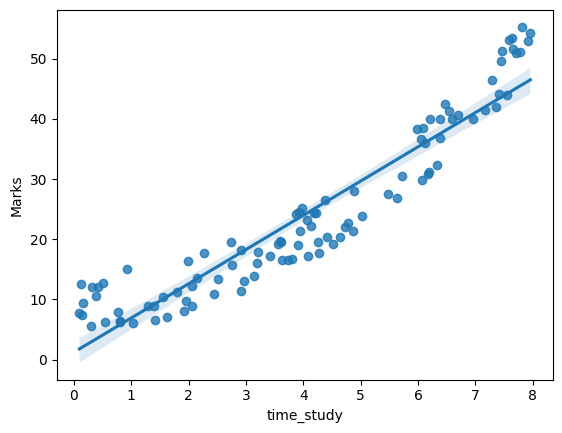

In [12]:
graph = sns.regplot(data, x="time_study", y="Marks")

Pomocí této funkce dokážeme predikovat, kolik bodů student nebo studentka kurzu získá, a to na základě počtu hodin, které strávil(a) studiem.

Tato funkce je označovaná jako "lineární" a k jejímu vykreslení potřebujeme znát dvě hodnoty:

- První je hodnota, která určuje, kde leží **průsečík s osou *y***, ve vzorci níže označená jako *a*. V našem případě jde o hodnotu, která udává počet bodů, který by získal(a) potenciální student(ka), který se na test vůbec nepřipravoval(a) (např. kolik otázek je možné si tipnout).
- Druhá je hodnota, která udává **sklon funkce**, ve vzorci níže označená jako *b*. Čím bude hodnota vyšší, tím více skloněná funkce bude. V našem případě toto číslo určí, kolik dodatečných bodů je možné získat hodinou studia navíc.

Jednoduchou lineární regresi s jednou závislou (*Y*) a jednou nezávislou (*x*) proměnnou lze tedy matematicky zapsat následovně (stejně jako rovnici přímky):
  * $Y = a + b*x$   

Do modelu lineární regrese lze přidávat další nezávislé proměnné. Vzorec pak může vypadat např. pro tři nezávislé proměnné takto:
  * $Y = a + b_{1}*x_{1}+ b_{2}*x_{2}+ b_{3}*x_{3}$ 

K zobrazení těchto hodnot můžeme použít modul *statmodels*. Ten zobrazí velkou tabulku se spoustou čísel, nás však budou zajímat pouze některá.

Vytvoříme a natrénujeme model pro predikci známky na základě času věnovaného studiu:

In [13]:
formula = "Marks ~ time_study"

mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Marks   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     775.8
Date:                Sun, 17 Nov 2024   Prob (F-statistic):           2.36e-48
Time:                        13:58:48   Log-Likelihood:                -298.21
No. Observations:                 100   AIC:                             600.4
Df Residuals:                      98   BIC:                             605.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2239      0.962      1.272      0.206      -0.686       3.133
time_study     5.6888      0.204     27.853      0.000       5.283       6.094
==============================================================================
Omnibus:                        7.504   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                4.633
Skew:                           0.357   Prob(JB):                       0.0986
Kurtosis:                       2.225   Cond. No.                         9.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podívejme se nejprve na dvě čísla (koeficienty - *coefficients*), která potřebujeme k nakreslení naší funkce:

- V řádku `intercept` máme hodnotu, která určuje, kde funkce protne se svislou osou.
- V řádku `time_study` máme hodnotu, která udává sklon funkce. Hodnota 5.6888 nám říká, že jedna hodina studia navíc přinese v průměru 5.6888 bodů navíc.

Pokud bychom chtěli odhadnout počet bodů na základě hodin strávených studiem, můžeme použít metodu `predict()`. K tomu si načteme data z tabulky `Study_Marks_to_estimate.csv`, kde nám chybí výsledná známka. Tu my odhadneme a odhady vložíme do dat jako nový sloupec.

In [14]:
data_to_predict = pd.read_csv("Study_Marks_to_estimate.csv")
data_to_predict

,number_courses,time_study
0,3,5.5
1,4,8.0
2,1,3.0


In [15]:
data_to_predict["MarksPredicted"] = res.predict(data_to_predict)
data_to_predict.head()

,number_courses,time_study,MarksPredicted
0,3,5.5,32.511985
1,4,8.0,46.733861
2,1,3.0,18.290109


### Vyhodnocení kvality modelu

Regresní model nevysvětlí data dokonale. Jak jsme si již řekli, na vysvětlovanou proměnnou působí další vlivy, které v datech nemáme. Regresní modely se mezi sebou liší podle toho, jak dobře vysvětlovanou proměnnou dokážou vysvětlit. Abychom tuto skutečnost dokázali vysvětlit, vznikl ukazatel označovaný jako koeficient determinace (*coefficient of determination*, *R-squared*). Ten říká, kolik procent variability (různorodosti) vysvětlované proměnné (v našem případě známky z testu) dokážeme pomocí našeho modelu vysvětlit. Koeficient determinace je číslo mezi 0 a 1 a platí, že čím vyšší koeficient determinace je, tím lépe náš model naše data popisuje.

Model se v matematických vzorcích často značí $R^2$, v naší tabulce je označen jako `R-squared`. Vidíme, že náš model má koeficient determinace 0.88, dokáže tedy vysvětlit přibližně 88 % variability známek z online kurzů.